In [2]:
import pandas as pd
import pickle as pkl
import numpy as np
import wordcloud
import matplotlib.pyplot as plt

In [3]:
with open('HMM_original_ds_fresults.txt','r') as o:
    original_fisher_ds = pd.read_csv(o, index_col = 0, dtype = str)
with open('PDB_ds_fresults.txt','r') as o:
    pdb_fisher_ds = pd.read_csv(o, index_col = 0, dtype = str)
with open('String_ds_fresults.txt','r') as o:
    string_fisher_ds = pd.read_csv(o, index_col = 0, dtype = str)
with open('New_string_ds_fresults.txt','r') as o:
    new_string_fisher_ds = pd.read_csv(o, index_col = 0, dtype = str)
arch_path = 'C:/Users/alber/OneDrive/Documenti/universita/DATA SCIENCE/Biological Data/PROJECT/'
with open(arch_path+'Fisher_Test/Architecture_Fisher_tests.pkl','rb') as o:
    arch_fisher_dss = pkl.load(o)

In [4]:
original_fisher_ds.head()

,GO_id,Original_freq,Human_freq,Odds_ratio,p-value,GO_description
0,0031514,1,99,3.937062937062937,0.22934905936220884,motile cilium
1,0035865,2,10,79.8313725490196,0.00042904284392668453,cellular response to potassium ion
2,0044306,1,20,19.564423076923077,0.053139044901491454,neuron projection terminus
3,0019900,3,96,12.669375,0.002172168034276123,kinase binding
4,0042391,1,96,4.060697115384615,0.22328787315610882,regulation of membrane potential


In [5]:
pdb_fisher_ds.head()

,GO_id,Original_freq,Human_freq,Odds_ratio,p-value,GO_description
0,0070207,1,24,26.27777777777778,0.03931319226648012,protein homotrimerization
1,0051393,1,12,52.56837606837607,0.020637087670019885,alpha-actinin binding
2,0005903,3,30,64.71842105263158,2.087579658827166e-05,brush border
3,0043154,1,47,13.41216584833606,0.07413153146793872,negative regulation of cysteine-type endopepti...
4,0043555,1,2,315.47435897435895,0.004800186226896813,regulation of translation in response to stress


### FREQUENCE WORDCLOUDS

In [20]:
def create_freq_wordcloud(ds):
    desc_freq = {ds['GO_description'][i]: int(ds['Original_freq'][i]) 
                      for i in ds.index if ds['Original_freq'][i] != np.nan}

    wcloud = wordcloud.WordCloud(width = 2000, height = 800, 
                background_color ='black',
                min_font_size = 10,max_words=100).generate_from_frequencies(frequencies = desc_freq, max_font_size=None)
    return wcloud

In [21]:
original_fisher_ds = original_fisher_ds.astype({"p-value": float, 'Odds_ratio': float})
original_fisher_ds[original_fisher_ds['p-value'] < 0.05].head()
original_wc = create_freq_wordcloud(original_fisher_ds[original_fisher_ds['p-value'] < 0.05])

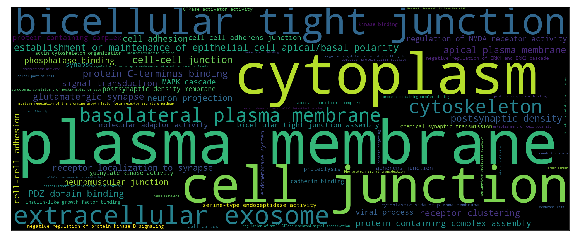

In [22]:
_ = plt.figure(figsize = (10,10))
plt.imshow(original_wc)
_ = plt.xticks([], [])
_ = plt.yticks([], [])


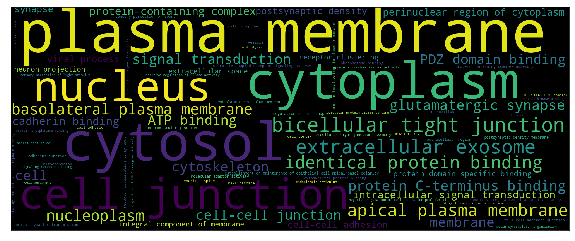

In [23]:
pdb_fisher_ds = pdb_fisher_ds.astype({"p-value": float, 'Odds_ratio': float})
pdb_wc = create_freq_wordcloud(pdb_fisher_ds[pdb_fisher_ds['p-value'] < 0.05])
_ = plt.figure(figsize = (10,10))
plt.imshow(pdb_wc)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

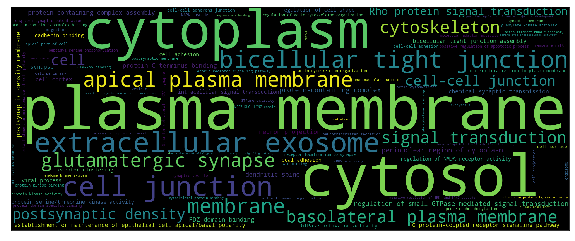

In [24]:
string_fisher_ds = string_fisher_ds.astype({"p-value": float, 'Odds_ratio': float})
string_wc = create_freq_wordcloud(string_fisher_ds[string_fisher_ds['p-value'] < 0.05])
_ = plt.figure(figsize = (10,10))
plt.imshow(string_wc)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

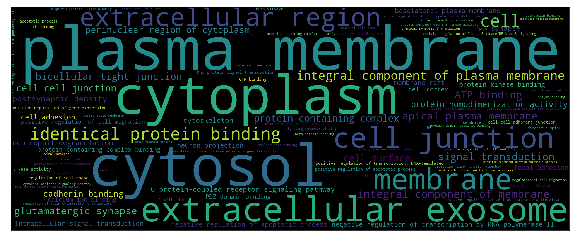

In [26]:
new_string_fisher_ds = new_string_fisher_ds.astype({"p-value": float, 'Odds_ratio': float})
new_string_wc = create_freq_wordcloud(new_string_fisher_ds[new_string_fisher_ds['p-value'] < 0.05])
_ = plt.figure(figsize = (10,10))
plt.imshow(new_string_wc)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

In [29]:
# the only two pfam domain sets which are present in more than 2 proteins are: PF00595; and PF00595;PF17820;
arch_ds1 = arch_fisher_dss['PF00595;']
arch_ds2 = arch_fisher_dss['PF00595;PF17820;']
arch_ds1.head()

,GO_id,Original_freq,Human_freq,Odds_ratio,p-value,GO_description
0,0005739,1,3,1.666667,0.539131,mitochondrion
1,0019221,1,1,5.200000,0.316468,cytokine-mediated signaling pathway
2,0030046,1,1,5.200000,0.316468,parallel actin filament bundle assembly
3,0042609,1,1,5.200000,0.316468,CD4 receptor binding
4,0016323,1,9,0.488889,1.000000,basolateral plasma membrane


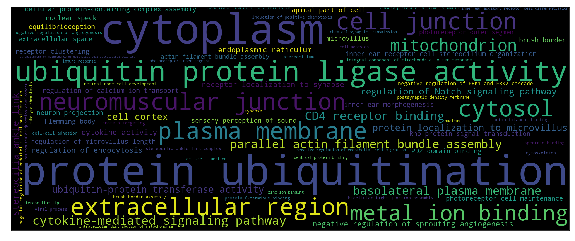

In [31]:
arch_ds1 = arch_ds1.astype({"p-value": float, 'Odds_ratio': float})

arch_wc1 = create_freq_wordcloud(arch_ds1)
_ = plt.figure(figsize = (10,10))
plt.imshow(arch_wc1)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

In [12]:
arch_ds2.head()

,GO_id,Original_freq,Human_freq,Odds_ratio,p-value,GO_description
0,0006811,1,1,17.333333,0.136591,ion transport
1,0009636,1,1,17.333333,0.136591,response to toxic substance
2,0031528,1,2,8.500000,0.199385,microvillus membrane
3,0070062,1,11,1.272727,1.000000,extracellular exosome
4,0014824,1,1,17.333333,0.136591,artery smooth muscle contraction


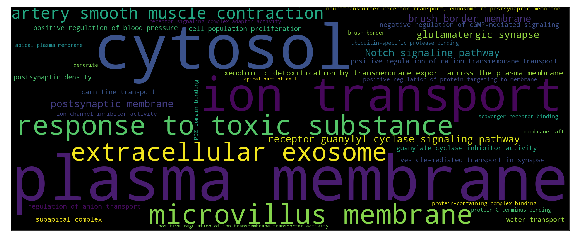

In [13]:
arch_wc2 = create_freq_wordcloud(arch_ds2)
_ = plt.figure(figsize = (10,10))
plt.imshow(arch_wc2)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

### P-VALUE WORDCLOUDS

In [14]:
# Here I tried to use some other functions to create the frequency paraeters based on pvalue in order to en


def create_pvalue_wordcloud(ds):
    desc_freq = {ds['GO_description'][i]: int(np.round(-np.log(np.float(ds['p-value'][i])))) 
                      for i in range(len(ds)) if ds['Original_freq'][i] != np.nan}

    wcloud = wordcloud.WordCloud(width = 2000, height = 800, 
                background_color ='black',
                min_font_size = 20,max_words=30).generate_from_frequencies(frequencies = desc_freq, max_font_size=None)
    return wcloud

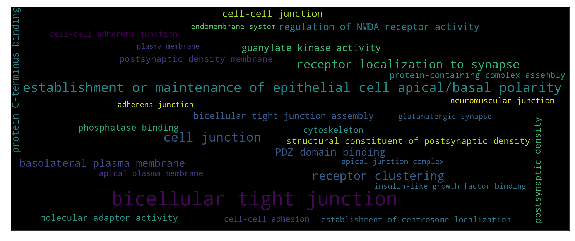

In [15]:
original_wc_b = create_pvalue_wordcloud(original_fisher_ds)
_ = plt.figure(figsize = (10,10))
plt.imshow(original_wc_b)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

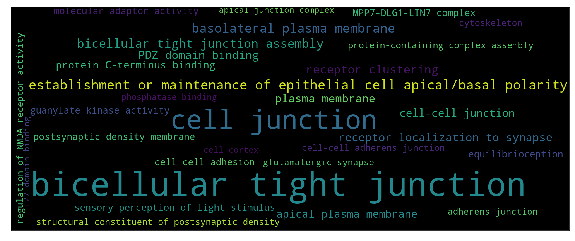

In [17]:
pdb_wc_b = create_pvalue_wordcloud(pdb_fisher_ds)
_ = plt.figure(figsize = (10,10))
plt.imshow(pdb_wc_b)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

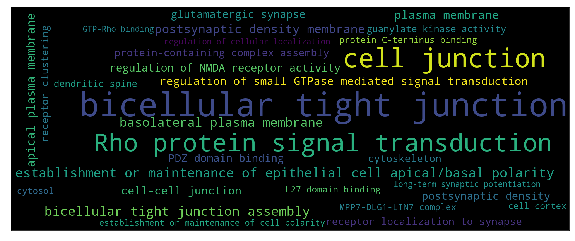

In [18]:
string_wc_b = create_pvalue_wordcloud(string_fisher_ds)
_ = plt.figure(figsize = (10,10))
plt.imshow(string_wc_b)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

In [ ]:
original_wc_b = create_pvalue_wordcloud(arch_ds1)
_ = plt.figure(figsize = (10,10))
plt.imshow(original_wc_b)
_ = plt.xticks([], [])
_ = plt.yticks([], [])

In [ ]:
original_wc_b = create_pvalue_wordcloud(original_fisher_ds)
_ = plt.figure(figsize = (10,10))
plt.imshow(original_wc_b)
_ = plt.xticks([], [])
_ = plt.yticks([], [])